In [1]:
import os
import pandas as pd
import numpy as np

Загружаю один датафрейм 2013 года, далее добавлю остальные. Сейчас хочу отработать алгоритм на одном ДФ.

In [2]:
data_dir = 'C:\\Users\\dserp\\ML\\Degree_ML\\full'
file_list = os.listdir(data_dir)

In [3]:
data2013f = pd.read_csv(os.path.join(data_dir, file_list[0]))
data2013f.head(10)

,,.1,Rank Indicators,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,...,United Kingdom.4,United States of America.4,Uruguay.4,Uzbekistan.4,"Venezuela, Bolivarian Republic of.4",Viet Nam.4,Yemen.4,Zambia.4,Zimbabwe.4,Unnamed: 752
0,Indicator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Global Innovation Index,,,93.0,138.0,135.0,56.0,59.0,19.0,23.0,...,Strength,,,Weakness,,,Weakness,,Weakness,NaN
2,Innovation Efficiency Index,,,129.0,141.0,22.0,20.0,42.0,116.0,98.0,...,Weakness,Weakness,,Weakness,Strength,Strength,,Strength,Strength,NaN
3,Innovation Input,,,77.0,112.0,140.0,78.0,71.0,11.0,17.0,...,Strength,Strength,,,Weakness,,Weakness,,Weakness,NaN
4,Innovation Output,,,118.0,141.0,117.0,43.0,47.0,32.0,27.0,...,Strength,,,Weakness,,,,,,NaN
5,Index,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1.,Institutions,,73.0,118.0,136.0,106.0,57.0,11.0,13.0,...,,,,,Weakness,Weakness,,,Weakness,NaN
7,1.1.,Political environment,,76.0,127.0,122.0,59.0,63.0,14.0,9.0,...,,,Strength,Weakness,Weakness,Weakness,Weakness,,Weakness,NaN
8,1.1.1.,Political stability and absence of violence/te...,,83.0,129.0,87.0,57.0,75.0,29.0,11.0,...,,,Strength,,Weakness,,,Strength,,NaN
9,1.1.2.,Government effectiveness,,81.0,113.0,137.0,80.0,74.0,10.0,14.0,...,,,,,Weakness,,,,Weakness,NaN


In [4]:
data2013f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Columns: 753 entries,   to Unnamed: 752
dtypes: float64(448), object(305)
memory usage: 694.3+ KB


In [5]:
data2013f['Rank Indicators'].unique()

array([nan, ' '], dtype=object)

In [6]:
data2013f.describe().T

,count,mean,std,min,25%,50%,75%,max
Albania,109.0,78.110092,30.394425,5.0,63.000,81.00,94.000,136.0
Algeria,102.0,99.401961,28.680990,7.0,80.500,105.00,120.750,141.0
Angola,94.0,110.287234,31.836823,18.0,97.000,122.00,134.000,142.0
Argentina,109.0,64.844037,31.064203,3.0,43.000,59.00,87.000,127.0
Armenia,108.0,63.277778,28.223353,2.0,46.500,61.00,82.500,129.0
...,...,...,...,...,...,...,...,...
Viet Nam.2,71.0,58.794366,188.403940,-0.6,1.250,5.20,27.500,1091.6
Yemen.2,62.0,25.967742,69.178140,-5.8,0.300,2.75,16.775,374.6
Zambia.2,64.0,44.145313,141.779670,-0.7,0.475,3.65,26.475,874.5
Zimbabwe.2,61.0,50.022951,162.991837,-1.9,0.300,2.40,38.100,1022.2


Предобработка

In [7]:
#Для дальнейшей обработки я делаю лист названий колонок
col_list = list(data2013f)
print(col_list[:120], '\n')
print(col_list[752])

[' ', ' .1', 'Rank Indicators', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bolivia, Plurinational State of', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Chad', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Cote dIvoire', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Guyana', 'Honduras', 'Hong Kong (China)', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran, Islamic Republic of', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Korea, Republic of', 'Kuwait', 'Kyrgyzstan', "Lao People's Democratic Republic", 'Latvia', 'Leb

In [8]:
#Переименовываю столбцы 
data2013f.rename(columns={col_list[1] : 'Indicator', col_list[2] : 'subindicator', col_list[752] : 'to_del'}, inplace=True)
data2013f.head()

,,Indicator,subindicator,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,...,United Kingdom.4,United States of America.4,Uruguay.4,Uzbekistan.4,"Venezuela, Bolivarian Republic of.4",Viet Nam.4,Yemen.4,Zambia.4,Zimbabwe.4,to_del
0,Indicator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Global Innovation Index,,,93.0,138.0,135.0,56.0,59.0,19.0,23.0,...,Strength,,,Weakness,,,Weakness,,Weakness,NaN
2,Innovation Efficiency Index,,,129.0,141.0,22.0,20.0,42.0,116.0,98.0,...,Weakness,Weakness,,Weakness,Strength,Strength,,Strength,Strength,NaN
3,Innovation Input,,,77.0,112.0,140.0,78.0,71.0,11.0,17.0,...,Strength,Strength,,,Weakness,,Weakness,,Weakness,NaN
4,Innovation Output,,,118.0,141.0,117.0,43.0,47.0,32.0,27.0,...,Strength,,,Weakness,,,,,,NaN


In [9]:
data2013f.head(10)

,,Indicator,subindicator,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,...,United Kingdom.4,United States of America.4,Uruguay.4,Uzbekistan.4,"Venezuela, Bolivarian Republic of.4",Viet Nam.4,Yemen.4,Zambia.4,Zimbabwe.4,to_del
0,Indicator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Global Innovation Index,,,93.0,138.0,135.0,56.0,59.0,19.0,23.0,...,Strength,,,Weakness,,,Weakness,,Weakness,NaN
2,Innovation Efficiency Index,,,129.0,141.0,22.0,20.0,42.0,116.0,98.0,...,Weakness,Weakness,,Weakness,Strength,Strength,,Strength,Strength,NaN
3,Innovation Input,,,77.0,112.0,140.0,78.0,71.0,11.0,17.0,...,Strength,Strength,,,Weakness,,Weakness,,Weakness,NaN
4,Innovation Output,,,118.0,141.0,117.0,43.0,47.0,32.0,27.0,...,Strength,,,Weakness,,,,,,NaN
5,Index,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1.,Institutions,,73.0,118.0,136.0,106.0,57.0,11.0,13.0,...,,,,,Weakness,Weakness,,,Weakness,NaN
7,1.1.,Political environment,,76.0,127.0,122.0,59.0,63.0,14.0,9.0,...,,,Strength,Weakness,Weakness,Weakness,Weakness,,Weakness,NaN
8,1.1.1.,Political stability and absence of violence/te...,,83.0,129.0,87.0,57.0,75.0,29.0,11.0,...,,,Strength,,Weakness,,,Strength,,NaN
9,1.1.2.,Government effectiveness,,81.0,113.0,137.0,80.0,74.0,10.0,14.0,...,,,,,Weakness,,,,Weakness,NaN


In [10]:
#удаляю строку 0 и 5 - они содержат только Nan (видимо для красоты таблички, для открытия в Excel)
data2013f.drop([0, 5], inplace = True)

#удаляю столбец 'to_del' - пустой
data2013f.drop('to_del', axis = 1, inplace = True)

#заполняю пропуски нулями
data2013f.fillna(0, inplace = True)

In [11]:
#в датафрейме есть значения '  ' - несколько пробелов, заменяю их на None
space = data2013f['United States of America.4'][1]
data2013f.replace(space, np.nan, inplace = True)

### разделяю df на df классов и df признаков

In [12]:
data2013f.head(15)

,,Indicator,subindicator,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,...,United Arab Emirates.4,United Kingdom.4,United States of America.4,Uruguay.4,Uzbekistan.4,"Venezuela, Bolivarian Republic of.4",Viet Nam.4,Yemen.4,Zambia.4,Zimbabwe.4
1,Global Innovation Index,NaN,NaN,93.0,138.0,135.0,56.0,59.0,19.0,23.0,...,NaN,Strength,NaN,NaN,Weakness,NaN,NaN,Weakness,NaN,Weakness
2,Innovation Efficiency Index,NaN,NaN,129.0,141.0,22.0,20.0,42.0,116.0,98.0,...,Weakness,Weakness,Weakness,NaN,Weakness,Strength,Strength,NaN,Strength,Strength
3,Innovation Input,NaN,NaN,77.0,112.0,140.0,78.0,71.0,11.0,17.0,...,NaN,Strength,Strength,NaN,NaN,Weakness,NaN,Weakness,NaN,Weakness
4,Innovation Output,NaN,NaN,118.0,141.0,117.0,43.0,47.0,32.0,27.0,...,NaN,Strength,NaN,NaN,Weakness,NaN,NaN,NaN,NaN,NaN
6,1.,Institutions,NaN,73.0,118.0,136.0,106.0,57.0,11.0,13.0,...,NaN,NaN,NaN,NaN,NaN,Weakness,Weakness,NaN,NaN,Weakness
7,1.1.,Political environment,NaN,76.0,127.0,122.0,59.0,63.0,14.0,9.0,...,NaN,NaN,NaN,Strength,Weakness,Weakness,Weakness,Weakness,NaN,Weakness
8,1.1.1.,Political stability and absence of violence/te...,NaN,83.0,129.0,87.0,57.0,75.0,29.0,11.0,...,NaN,NaN,NaN,Strength,NaN,Weakness,NaN,NaN,Strength,NaN
9,1.1.2.,Government effectiveness,NaN,81.0,113.0,137.0,80.0,74.0,10.0,14.0,...,NaN,NaN,NaN,NaN,NaN,Weakness,NaN,NaN,NaN,Weakness
10,1.1.3.,Press freedom,NaN,81.0,101.0,105.0,45.0,61.0,24.0,10.0,...,Weakness,NaN,NaN,Strength,Weakness,NaN,Weakness,NaN,NaN,NaN
11,1.2.,Regulatory environment,NaN,89.0,113.0,135.0,127.0,51.0,14.0,9.0,...,NaN,NaN,NaN,NaN,NaN,Weakness,Weakness,NaN,Weakness,Weakness


In [13]:
#датафрейм с фичами, под индексы оставляю
ds2013f_fe = data2013f.loc[5:, :'Zimbabwe']#.drop(labels = 'Indicator', axis = 1)
ds2013f_fe.head(10)

,,Indicator,subindicator,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,...,United Arab Emirates,United Kingdom,United States of America,Uruguay,Uzbekistan,"Venezuela, Bolivarian Republic of",Viet Nam,Yemen,Zambia,Zimbabwe
6,1.,Institutions,NaN,73.0,118.0,136.0,106.0,57.0,11.0,13.0,...,33.0,14.0,17.0,45.0,126.0,142.0,122.0,137.0,111.0,141.0
7,1.1.,Political environment,NaN,76.0,127.0,122.0,59.0,63.0,14.0,9.0,...,36.0,23.0,25.0,31.0,131.0,132.0,116.0,141.0,68.0,135.0
8,1.1.1.,Political stability and absence of violence/te...,NaN,83.0,129.0,87.0,57.0,75.0,29.0,11.0,...,24.0,48.0,44.0,25.0,101.0,127.0,58.0,140.0,47.0,120.0
9,1.1.2.,Government effectiveness,NaN,81.0,113.0,137.0,80.0,74.0,10.0,14.0,...,34.0,16.0,21.0,44.0,120.0,134.0,86.0,136.0,112.0,142.0
10,1.1.3.,Press freedom,NaN,81.0,101.0,105.0,45.0,61.0,24.0,10.0,...,92.0,27.0,29.0,25.0,133.0,95.0,137.0,135.0,59.0,106.0
11,1.2.,Regulatory environment,NaN,89.0,113.0,135.0,127.0,51.0,14.0,9.0,...,35.0,8.0,13.0,60.0,123.0,141.0,115.0,129.0,137.0,142.0
12,1.2.1.,Regulatory quality,NaN,64.0,136.0,135.0,123.0,65.0,8.0,17.0,...,58.0,13.0,16.0,56.0,140.0,139.0,117.0,125.0,106.0,142.0
13,1.2.2.,Rule of law,NaN,93.0,114.0,133.0,101.0,81.0,9.0,7.0,...,47.0,15.0,17.0,40.0,139.0,141.0,91.0,136.0,88.0,142.0
14,1.2.3.,Cost of redundancy dismissal,NaN,97.0,82.0,130.0,127.0,45.0,47.0,1.0,...,1.0,24.0,1.0,96.0,82.0,138.0,109.0,118.0,137.0,138.0
15,1.3.,Business environment,NaN,73.0,113.0,134.0,117.0,49.0,11.0,22.0,...,35.0,9.0,15.0,65.0,99.0,142.0,130.0,101.0,69.0,138.0


In [14]:
ds2013f_cl = data2013f.loc[:5, :'Zimbabwe'].drop(labels = 'subindicator', axis = 1) #датафрейм сосновными индикаторами
ds2013f_cl.head(10)

,,Indicator,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,...,United Arab Emirates,United Kingdom,United States of America,Uruguay,Uzbekistan,"Venezuela, Bolivarian Republic of",Viet Nam,Yemen,Zambia,Zimbabwe
1,Global Innovation Index,NaN,93.0,138.0,135.0,56.0,59.0,19.0,23.0,105.0,...,38.0,3.0,5.0,52.0,133.0,114.0,76.0,142.0,118.0,132.0
2,Innovation Efficiency Index,NaN,129.0,141.0,22.0,20.0,42.0,116.0,98.0,117.0,...,133.0,60.0,86.0,45.0,135.0,10.0,17.0,124.0,32.0,25.0
3,Innovation Input,NaN,77.0,112.0,140.0,78.0,71.0,11.0,17.0,92.0,...,26.0,4.0,3.0,64.0,114.0,134.0,89.0,141.0,128.0,138.0
4,Innovation Output,NaN,118.0,141.0,117.0,43.0,47.0,32.0,27.0,114.0,...,81.0,4.0,12.0,46.0,138.0,92.0,54.0,139.0,103.0,116.0


In [15]:
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

In [16]:
df1 = ds2013f_cl.T.reset_index()
df1.head()

,index,1,2,3,4
0,,Global Innovation Index,Innovation Efficiency Index,Innovation Input,Innovation Output
1,Indicator,NaN,NaN,NaN,NaN
2,Albania,93,129,77,118
3,Algeria,138,141,112,141
4,Angola,135,22,140,117


In [17]:
colunms_name = ['Country']
for i in list(df1.loc[0])[1:5]:
    colunms_name.append(i.lstrip())

In [19]:
df1.columns = colunms_name
df1.drop([0,1], inplace = True)
df1.head()

,Country,Global Innovation Index,Innovation Efficiency Index,Innovation Input,Innovation Output
2,Albania,93,129,77,118
3,Algeria,138,141,112,141
4,Angola,135,22,140,117
5,Argentina,56,20,78,43
6,Armenia,59,42,71,47


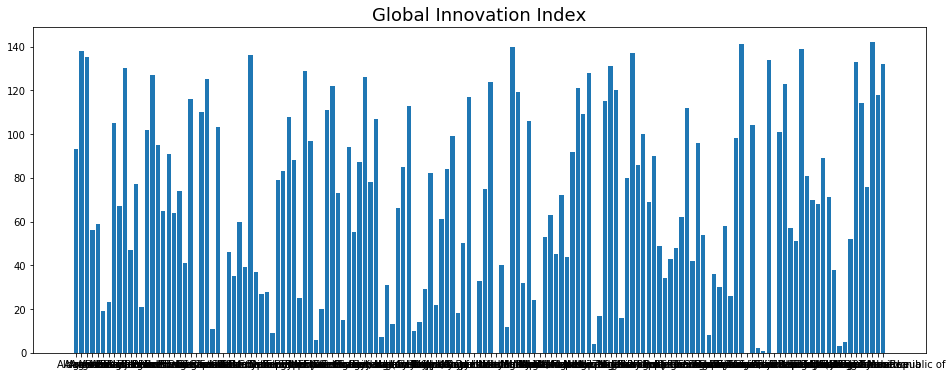

In [23]:
fig, ax = plt.subplots()
ax.bar(df1['Country'], df1['Global Innovation Index'])
ax.set_title('Global Innovation Index', fontdict={'size':18})
fig.set_figwidth(16)
fig.set_figheight(6)
plt.show()

График выглядит так, как-будто можно выделить зоны, однако если упорядочить не по названию страны, а по значению индекса получается гладкая, столбчатая восходящая диаграмма.

In [ ]:
df1['Global Innovation Index']

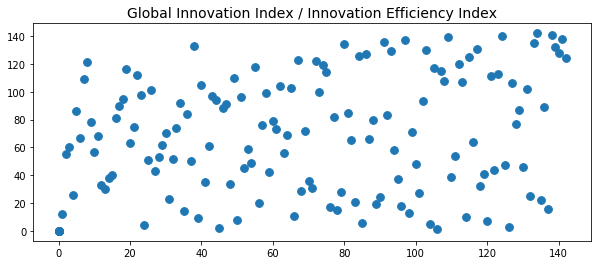

In [41]:
fig, ax = plt.subplots()
ax.scatter(df1['Global Innovation Index'], df1['Innovation Efficiency Index'], cmap='autumn', s=60)
ax.set_title('Global Innovation Index / Innovation Efficiency Index', fontdict={'size':14})
fig.set_figwidth(10)
fig.set_figheight(4)
plt.show()

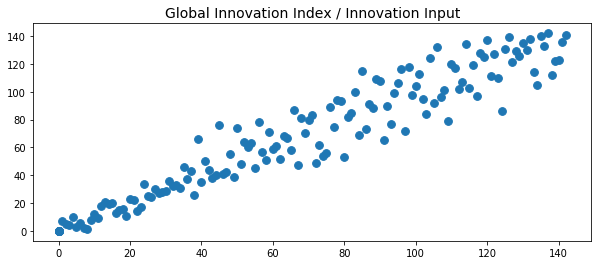

In [40]:
fig, ax = plt.subplots()
ax.scatter(df1['Global Innovation Index'], df1['Innovation Input'], cmap='autumn', s=60)
ax.set_title('Global Innovation Index / Innovation Input', fontdict={'size':14})
fig.set_figwidth(10)
fig.set_figheight(4)
plt.show()

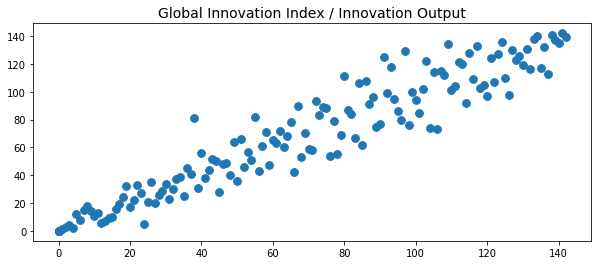

In [38]:
fig, ax = plt.subplots()
ax.scatter(df1['Global Innovation Index'], df1['Innovation Output'], cmap='autumn', s=60)
ax.set_title('Global Innovation Index / Innovation Output', fontdict={'size':14})
fig.set_figwidth(10)
fig.set_figheight(4)
plt.show()

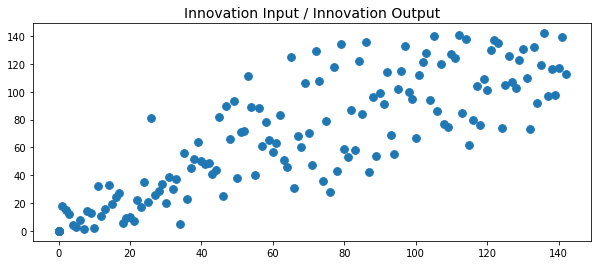

In [39]:
fig, ax = plt.subplots()
ax.scatter(df1['Innovation Input'], df1['Innovation Output'], cmap='autumn', s=60)
ax.set_title('Innovation Input / Innovation Output', fontdict={'size':14})
fig.set_figwidth(10)
fig.set_figheight(4)
plt.show()

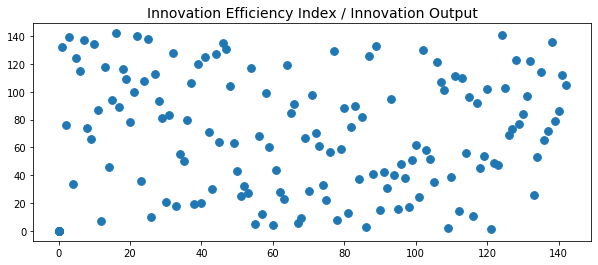

In [37]:
fig, ax = plt.subplots()
ax.scatter(df1['Innovation Efficiency Index'], df1['Innovation Input'], cmap='autumn', s=60)
ax.set_title('Innovation Efficiency Index / Innovation Output', fontdict={'size':14})
fig.set_figwidth(10)
fig.set_figheight(4)
plt.show()

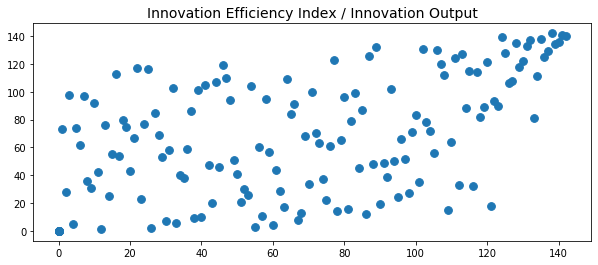

In [43]:
fig, ax = plt.subplots()
ax.scatter(df1['Innovation Efficiency Index'], df1['Innovation Output'], cmap='autumn', s=60)
ax.set_title('Innovation Efficiency Index / Innovation Output', fontdict={'size':14})
fig.set_figwidth(10)
fig.set_figheight(4)
plt.show()

Явно прослеживаются зависимости:  
'Global Innovation Index / Innovation Input'  
'Global Innovation Index / Innovation Output'  
'Innovation Input / Innovation Output'  
'Innovation Efficiency Index / Innovation Output'
  
___Innovation Input Sub-Index___: Five input pillars capture elements
of the national economy that enable innovative activities.  

___Innovation Output Sub-Index___: Innovation outputs are the result
of innovative activities within the economy. Although the Output
Sub-Index includes only two pillars, it has the same weight in
calculating the overall GII scores as the Input Sub-Index. 